In [22]:
import pandas as pd
import numpy as np
from URMC import URMC
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data/data.csv',sep=":")

In [3]:
df.head(10)

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,"10,000",10000,"10,468","10,000",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"10,000",10000,"10,468","10,001",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,"10,000",10000,"10,468","10,003",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,"10,000",10000,"10,468","10,004",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"10,000",10000,"10,468","10,005",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,"10,000",10000,"10,468","10,006",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,"10,000",10000,"10,468","10,008",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,"10,000",10000,"10,468","10,009",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,"10,000",10000,"10,468","10,010",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,"10,000",10000,"10,468","10,011",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df.describe()

,company_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
count,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000,12034.000000
mean,27247.797906,0.217901,0.031660,0.021522,0.986455,0.013877,0.024215,0.037893,0.753532,0.001005,0.076533
std,12024.542988,0.384535,0.122611,0.116995,0.115597,0.116987,0.128646,0.190945,0.430972,0.020134,0.265860
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,50000.000000,1.000000,0.900000,0.800000,1.000000,1.000000,0.800000,1.000000,1.000000,0.600000,1.000000


In [5]:
df.dtypes

receipt_id                  object
company_id                   int64
matched_transaction_id      object
feature_transaction_id      object
DateMappingMatch           float64
AmountMappingMatch         float64
DescriptionMatch           float64
DifferentPredictedTime     float64
TimeMappingMatch           float64
PredictedNameMatch         float64
ShortNameMatch             float64
DifferentPredictedDate     float64
PredictedAmountMatch       float64
PredictedTimeCloseMatch    float64
dtype: object

In [6]:
df['Target'] = np.where(df.matched_transaction_id==df.feature_transaction_id,1,0)

In [7]:
print(df.columns)

Index(['receipt_id', 'company_id', 'matched_transaction_id',
       'feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch', 'Target'],
      dtype='object')


In [8]:
feature_cols = ['DateMappingMatch', 'AmountMappingMatch','DescriptionMatch','TimeMappingMatch','PredictedNameMatch', 'ShortNameMatch','PredictedAmountMatch', 'PredictedTimeCloseMatch','DifferentPredictedTime','DifferentPredictedDate']

Normalizing the feature columns

In [9]:
df[feature_cols] = df[feature_cols].apply(lambda x: (x-x.min())/ (x.max()-x.min()), axis=0)

### Calculating Weights for features using URMC Algorithm

In [10]:
urmc = URMC(feature_cols)

In [11]:
urmc.fit(df)

In [12]:
urmc.weights

{'DateMappingMatch': 2.0813790721477865,
 'AmountMappingMatch': 0.2808079170071903,
 'DescriptionMatch': 0.9373190580664719,
 'TimeMappingMatch': 2.1428525144566497,
 'PredictedNameMatch': 1.3861790221265509,
 'ShortNameMatch': 1.229578443415623,
 'PredictedAmountMatch': -0.19402420633979936,
 'PredictedTimeCloseMatch': 1.3194918744941342,
 'DifferentPredictedTime': -2.155777642109633,
 'DifferentPredictedDate': -2.002463257365301}

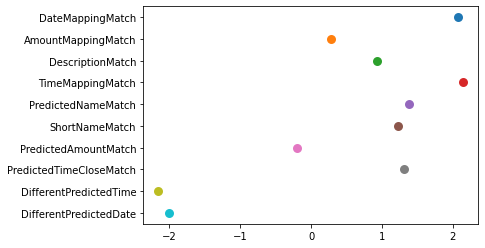

In [13]:
urmc.visalize_features()

In [24]:
pred = urmc.score(df)

In [35]:
def evaluate_model(y_true,y_pred,data):
    """
    """
    data['Pred'] = y_pred
    data['Max_Score'] = data.groupby('matched_transaction_id')['Pred'].transform('max')
    data['Predicted'] = np.where(data['Pred']==data['Max_Score'],1,0)
    
    print(classification_report(data['Target'],data['Predicted']))

In [36]:
evaluate_model(df['Target'],pred,df)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     11177
           1       0.29      0.88      0.44       857

    accuracy                           0.84     12034
   macro avg       0.64      0.86      0.67     12034
weighted avg       0.94      0.84      0.87     12034

